In [1]:
# importing the numpy library
import numpy as np

**Linear Regression**

In [18]:
class Linear_Regression():

  #initiating the parameters (learning rate & no of iteration)
  def __init__(self, learning_rate, no_of_iteration):            # LR and NOI are hyper parameters

    self.learning_rate = learning_rate
    self.no_of_iteration = no_of_iteration

  def fit(self, X, Y ):                                      

    # no of training ex and no of features
    self.m, self.n = X.shape                                # no of rows and columns

    # initiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y 

    # implementing Gradient Descent
    for i in range(self.no_of_iteration):
      self.update_weights()
  
  def update_weights(self):                                 # weight and bias are model parameters

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = -  2 * np.sum(self.Y - Y_prediction)/self.m

    # updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
  
  def predict(self,X):

    return X.dot(self.w) + self.b
  

Using **Linear Regression** Model for Prediction:



In [20]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data Pre-processing



In [21]:
# loading the data from csv file to pandas dataframe
salary_data = pd.read_csv("/content/sample_data/salary_data.csv")

In [22]:
# printing first five rows
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
# last five rows 
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
# no of rows and columns in the dataframe
salary_data.shape

(30, 2)

In [8]:
# checking missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the Feature and the target variable

In [23]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [24]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [25]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training and testing data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7,random_state = 2)

Training the Linear Regression Model

In [44]:
model = Linear_Regression(learning_rate = 0.02, no_of_iteration=10000)

In [45]:
model.fit(X_train,Y_train)

In [46]:
# printing the parameter values(weights and bias)

print('Weight = ',model.w[0])
print('bias = ',model.b)

Weight =  9532.83553603681
bias =  23750.93556359476


y = 9534(x) + 23735

salary = 9534(experience) + 23735

Predict the Salary value for test data

In [47]:
test_data_prediction = model.predict(X_test)

In [48]:
print(test_data_prediction)

[ 36143.62176044  34237.05465324  66648.69547576  59022.42704693
  91434.06786946  80947.94877982 101920.1869591   52349.44217171
  42816.60663567]


Visualizing the predicted values and actual values

[]

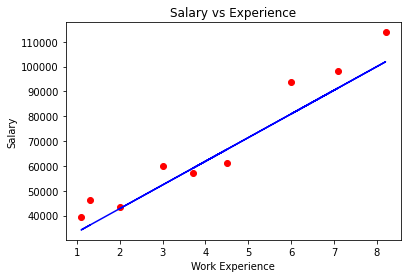

In [49]:
plt.scatter(X_test, Y_test, color = 'r')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.plot()